In [1]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import  PCA
import matplotlib.pyplot as plt

In [2]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosRG.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.567933,0.468963,0.418387,0.397268,0.366222,0.314062,0.305755,0.396973,0.528640,0.530481,...,0.553042,0.550603,0.541435,0.543974,0.556192,0.566876,0.602345,0.627477,0.676326,3
1,0.357207,0.312090,0.266491,0.252556,0.274381,0.292628,0.282017,0.257519,0.260231,0.286517,...,0.593430,0.588292,0.572961,0.566345,0.565697,0.559901,0.575898,0.581218,0.610140,3
2,0.312563,0.307927,0.255154,0.212121,0.208340,0.222300,0.231618,0.234574,0.245502,0.252881,...,0.621034,0.616308,0.600225,0.592773,0.591315,0.584525,0.600805,0.606444,0.637230,3
3,0.296776,0.307322,0.277153,0.242500,0.254109,0.283406,0.277839,0.244421,0.252737,0.305865,...,0.607069,0.608714,0.599235,0.597644,0.600575,0.595629,0.610977,0.611923,0.634690,3
4,0.244860,0.183807,0.154699,0.148348,0.149485,0.151795,0.160408,0.173335,0.185585,0.187322,...,0.720240,0.723352,0.713522,0.713116,0.717857,0.712581,0.730649,0.730299,0.754630,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12116,0.110724,0.117143,0.108315,0.094340,0.095868,0.113917,0.128631,0.120617,0.103777,0.103601,...,0.904124,0.903131,0.884643,0.877637,0.877998,0.868636,0.891624,0.897031,0.938228,3
12117,0.123169,0.056995,0.075046,0.085722,0.073361,0.089574,0.134921,0.136902,0.083655,0.069436,...,0.914451,0.924044,0.919261,0.927998,0.943784,0.945054,0.974174,0.973854,1.000000,3
12118,0.149852,0.098694,0.087556,0.092886,0.097180,0.102063,0.106407,0.091439,0.060448,0.054961,...,0.949209,0.963151,0.959169,0.965922,0.976643,0.969675,0.989756,0.980251,1.000000,3
12119,0.232100,0.166834,0.098958,0.090816,0.123015,0.141063,0.122684,0.100418,0.125119,0.179554,...,0.909980,0.926298,0.928572,0.943763,0.964274,0.966858,0.993788,0.985947,1.000000,3


In [3]:
data_t =  data.T

In [4]:
data_t

,0,1,2,3,4,5,6,7,8,9,...,12111,12112,12113,12114,12115,12116,12117,12118,12119,12120
0,0.567933,0.357207,0.312563,0.296776,0.244860,0.350586,0.287251,0.216728,0.271050,0.343475,...,0.073647,0.294543,0.228736,0.150298,0.110549,0.110724,0.123169,0.149852,0.232100,0.243073
1,0.468963,0.312090,0.307927,0.307322,0.183807,0.336300,0.104099,0.192897,0.249572,0.323105,...,0.047541,0.245175,0.261757,0.101963,0.069216,0.117143,0.056995,0.098694,0.166834,0.200749
2,0.418387,0.266491,0.255154,0.277153,0.154699,0.309237,0.104618,0.173718,0.303283,0.276764,...,0.057108,0.194670,0.286758,0.330792,0.093381,0.108315,0.075046,0.087556,0.098958,0.192990
3,0.397268,0.252556,0.212121,0.242500,0.148348,0.307617,0.235937,0.168887,0.343315,0.248043,...,0.062392,0.203087,0.243508,0.400448,0.137289,0.094340,0.085722,0.092886,0.090816,0.189484
4,0.366222,0.274381,0.208340,0.254109,0.149485,0.335980,0.344171,0.172591,0.342420,0.257685,...,0.056868,0.234018,0.195193,0.061029,0.138639,0.095868,0.073361,0.097180,0.123015,0.179124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.566876,0.559901,0.584525,0.595629,0.712581,0.569089,0.668886,0.709209,0.635406,0.632324,...,0.927872,0.700428,0.625857,0.917894,0.942603,0.868636,0.945054,0.969675,0.966858,0.818890
340,0.602345,0.575898,0.600805,0.610977,0.730649,0.581146,0.677691,0.730824,0.674621,0.651088,...,0.960252,0.711903,0.647480,0.871701,0.975971,0.891624,0.974174,0.989756,0.993788,0.852398
341,0.627477,0.581218,0.606444,0.611923,0.730299,0.585907,0.675752,0.732848,0.692625,0.653213,...,0.965770,0.698703,0.660524,0.750848,0.976396,0.897031,0.973854,0.980251,0.985947,0.861424
342,0.676326,0.610140,0.637230,0.634690,0.754630,0.618420,0.705150,0.757787,0.727339,0.676759,...,1.000000,0.702311,0.703410,0.605834,1.000000,0.938228,1.000000,1.000000,1.000000,0.894761


In [5]:
data_t =  data_t.drop(labels='id', axis=0)

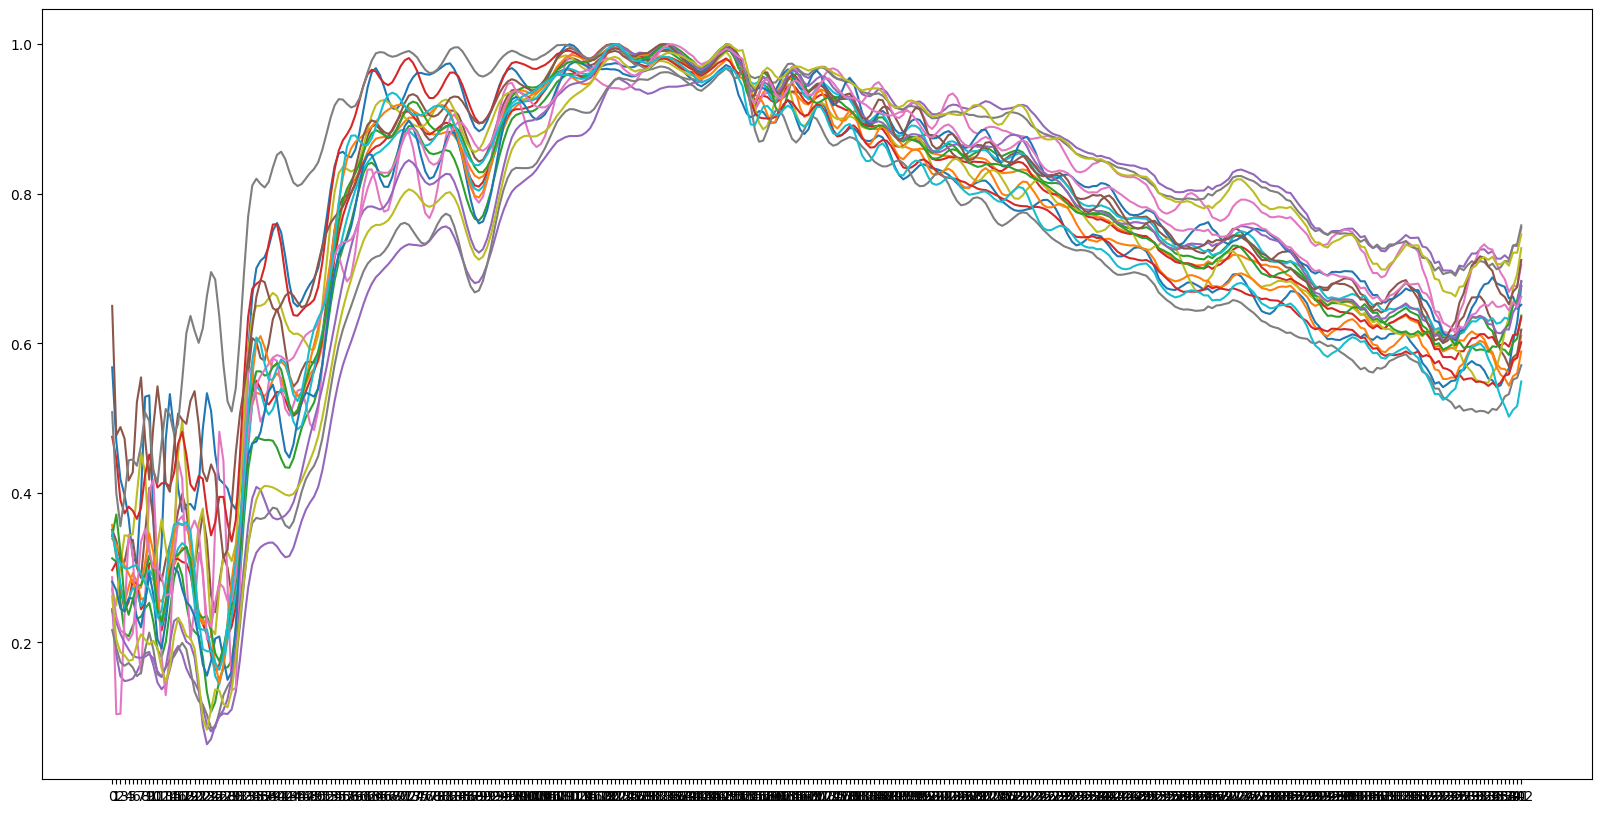

In [6]:
plt.figure(figsize=(20,10))
plt.plot(data_t.iloc[:, 0:20])

In [7]:
#iteration to visualize the optimal number of components in PCA
for i in range(1,50):
  data = []
  pca = PCA(n_components=i)
  features_reduced = pca.fit_transform(data_t)
  print(f"n = {i}")
  print(pca.explained_variance_ratio_.sum())
  data.append(pca.explained_variance_ratio_.sum())

n = 1
0.7450794398324585
n = 2
0.9818384288608517
n = 3
0.9884950662021267
n = 4
0.9899247240265169
n = 5
0.99086355679694
n = 6
0.9915885548490667
n = 7
0.992215494148483
n = 8
0.99282140489289
n = 9
0.9933139792063624
n = 10
0.9937593443881652
n = 11
0.9941106380544541
n = 12
0.9944387706904692
n = 13
0.9947467948907706
n = 14
0.9950312125089928
n = 15
0.9953090174218727
n = 16
0.9955619050499108
n = 17
0.9957881797550318
n = 18
0.995999864653608
n = 19
0.9962010910949929
n = 20
0.9963889708464498
n = 21
0.9965698816298855
n = 22
0.9967439966375754
n = 23
0.996901829756293
n = 24
0.997050462351568
n = 25
0.9971807304564074
n = 26
0.9973037426717724
n = 27
0.9974234942180044
n = 28
0.9975351738534555
n = 29
0.9976402763730471
n = 30
0.9977417934981019
n = 31
0.9978412101143417
n = 32
0.9979366198090937
n = 33
0.998020113966355
n = 34
0.9981012153746625
n = 35
0.9981754693234156
n = 36
0.9982482003314095
n = 37
0.9983156241976177
n = 38
0.9983829471997729
n = 39
0.9984454714491015
n = 

In [8]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=10)
pca_transformed = pca_data.fit_transform(data_t)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [9]:
pca_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,47.593180,12.253762,-3.049767,1.596594,4.276402,-0.616387,-0.787689,-0.125312,8.799192,-0.420350
1,50.295902,14.155321,-3.475731,1.697656,3.867899,-0.848685,0.354147,-1.162103,2.979839,-0.599041
2,51.875827,15.640049,-3.859074,1.228962,2.527564,0.234895,0.094091,-1.169367,-2.704326,-0.244879
3,52.483358,16.023410,-3.764163,0.730065,1.870078,0.327504,-0.230094,-0.541649,-3.334310,-0.296919
4,52.421166,15.607068,-3.527463,0.900882,2.034695,-0.148068,0.266005,-0.026879,-0.657029,-0.434817
...,...,...,...,...,...,...,...,...,...,...
338,-20.094944,24.097040,5.698089,5.464958,-0.282734,1.182551,0.274130,2.287962,-0.076777,-1.174627
339,-19.968565,24.383833,5.868188,6.479508,-0.720817,0.585935,0.219859,1.256196,-0.084789,-0.652091
340,-22.547518,24.259993,6.426232,7.023888,-1.227750,-0.049581,0.011284,0.045221,0.005630,0.333889
341,-22.759197,24.062794,6.408133,6.612556,-1.357572,-0.731533,-0.215379,-1.413577,0.108534,1.502466


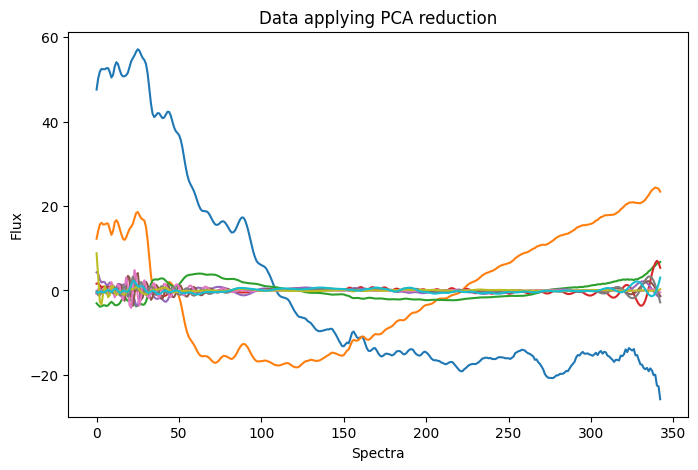

In [10]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(pca_transformed_data)
plt.show()

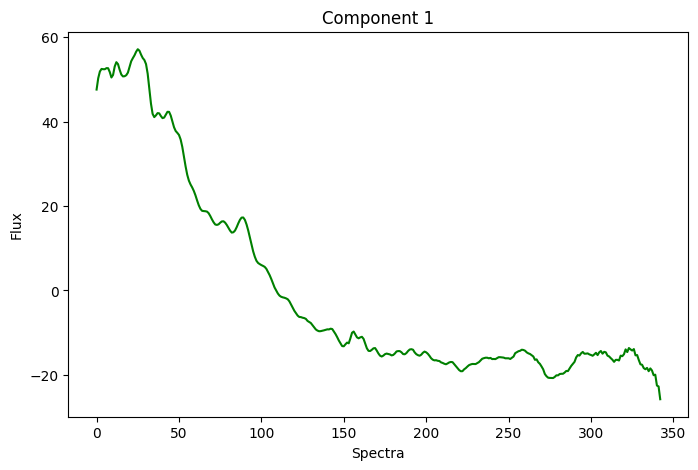

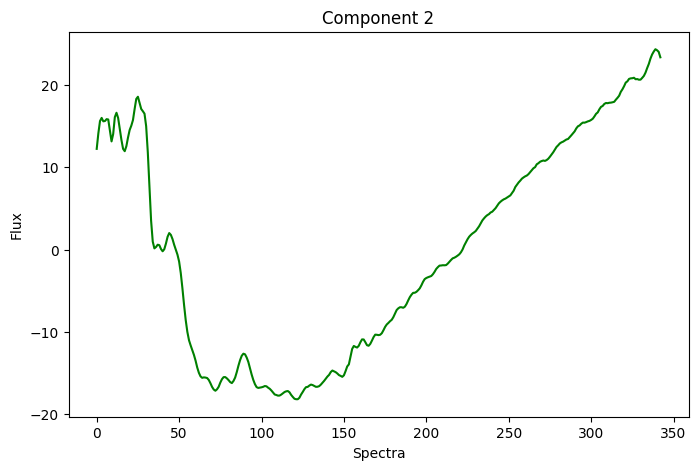

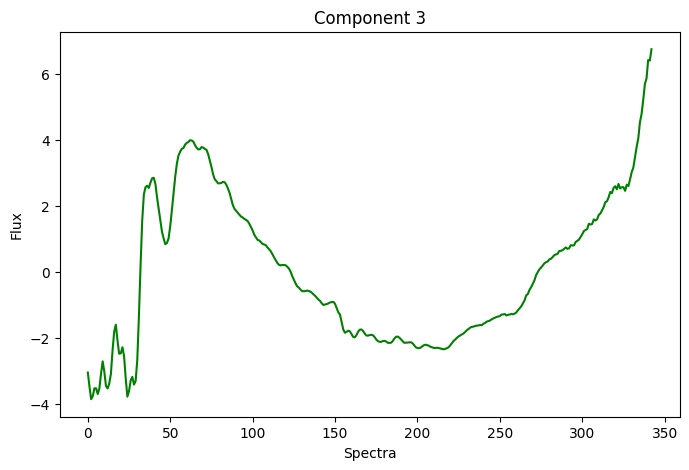

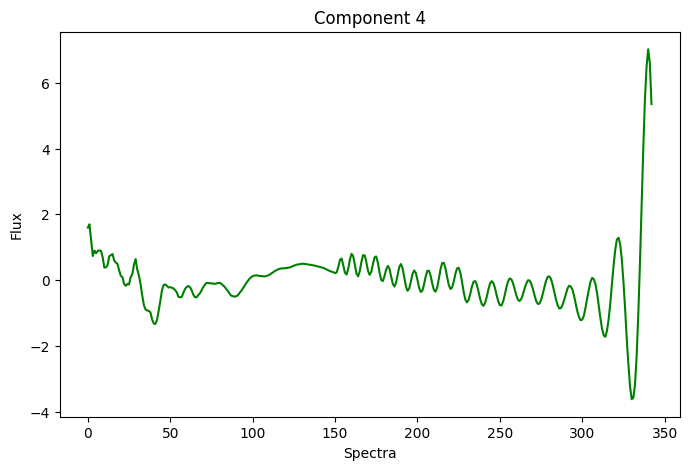

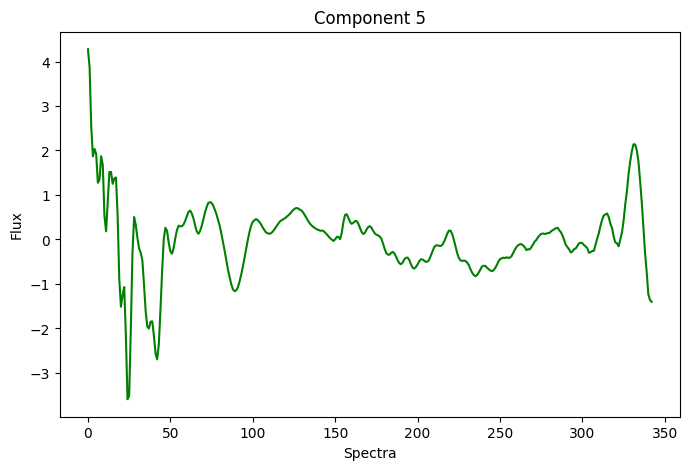

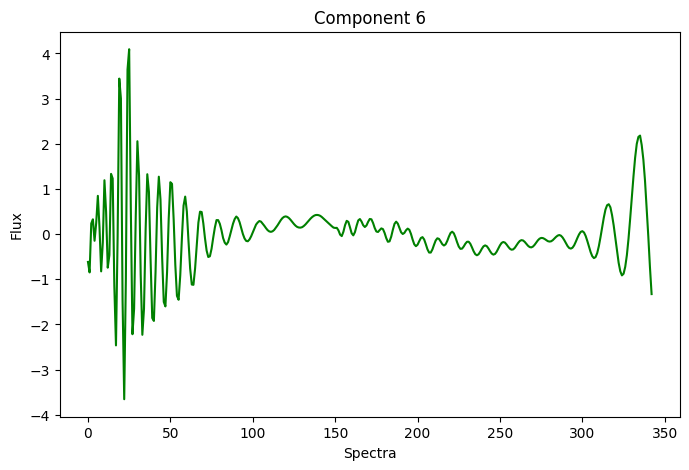

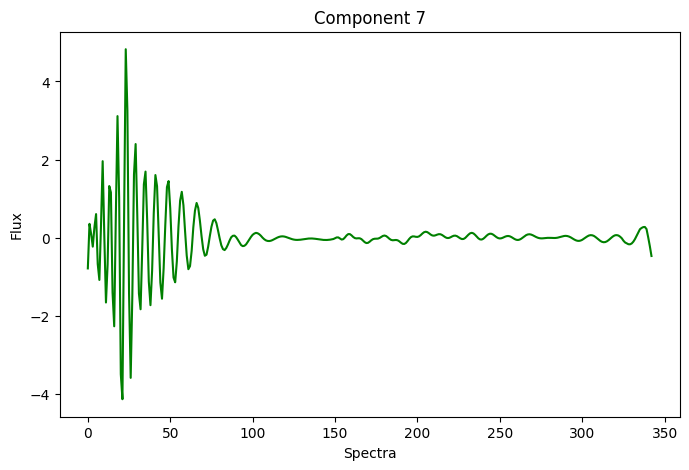

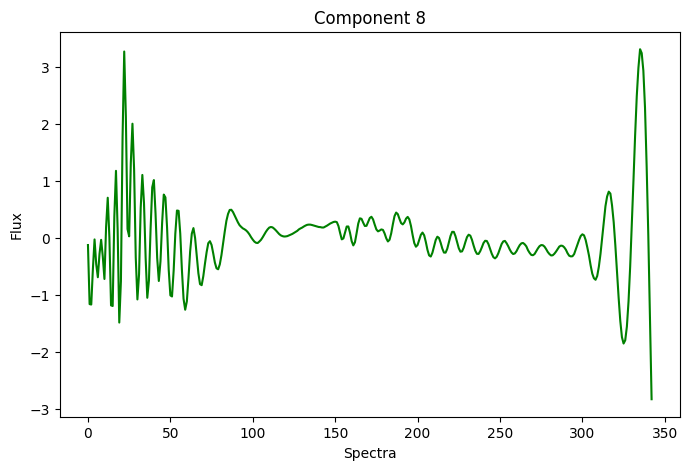

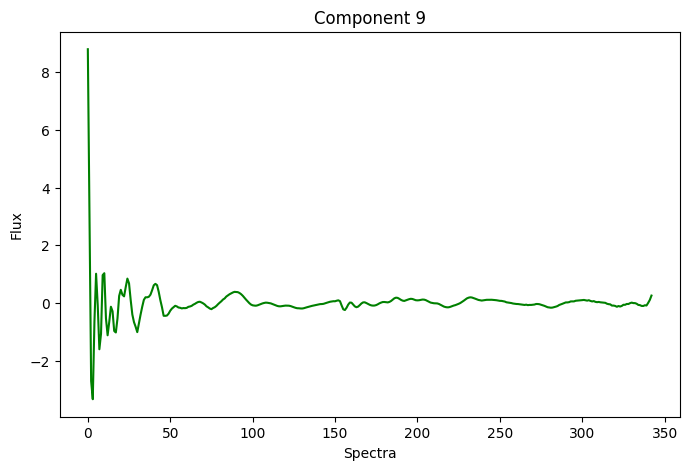

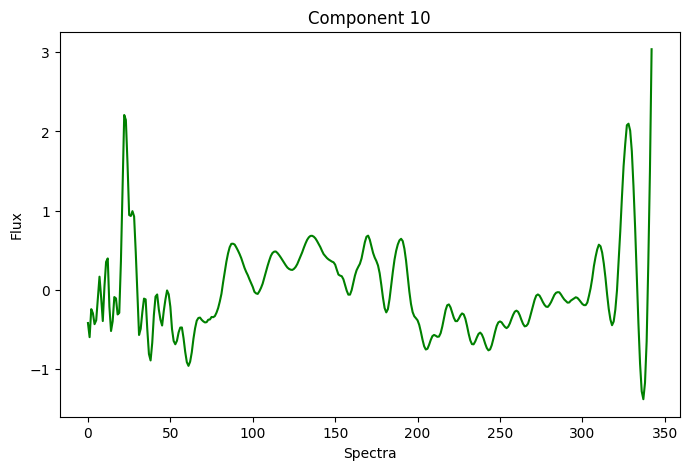

In [19]:
for i in range(1,11):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(pca_transformed_data.iloc[:,i-1:i], '-',markersize=1, color = "g")
    plt.show()

In [26]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=70)
lle_transformed = lle.fit_transform(data_t)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [27]:
lle_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,0.091953,0.073950,-0.006589,0.051410,0.030307,0.001876,-0.001965,-0.000310,0.016795,0.001884
1,0.095777,0.082174,-0.007777,0.059447,0.032823,0.001894,-0.001844,-0.000227,0.014555,0.001621
2,0.098064,0.087277,-0.008809,0.069517,0.040603,0.002435,-0.002433,-0.000336,0.018755,0.002064
3,0.098840,0.088957,-0.009106,0.072115,0.042272,0.002535,-0.002507,-0.000328,0.018578,0.002022
4,0.098547,0.088250,-0.008892,0.069518,0.039708,0.002332,-0.002251,-0.000269,0.016240,0.001760
...,...,...,...,...,...,...,...,...,...,...
338,-0.078185,0.082034,0.085967,-0.062046,0.088714,-0.283492,0.122673,0.026186,-0.011574,0.131088
339,-0.078542,0.082499,0.067702,-0.065207,0.090255,-0.325102,0.051240,0.008329,-0.014965,0.130768
340,-0.077159,0.080412,0.157493,-0.046343,0.077584,-0.335831,-0.018621,-0.014536,-0.023231,0.116104
341,-0.076674,0.079455,0.166352,-0.042754,0.071330,-0.302799,-0.086254,-0.051478,-0.028813,0.069526


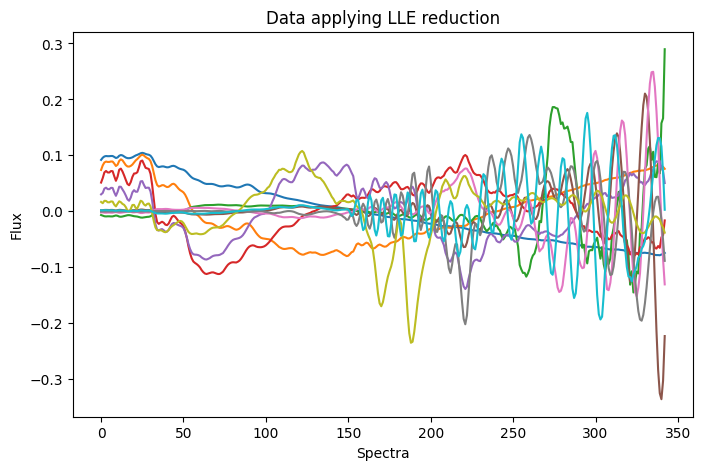

In [28]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(lle_transformed_data)
plt.show()

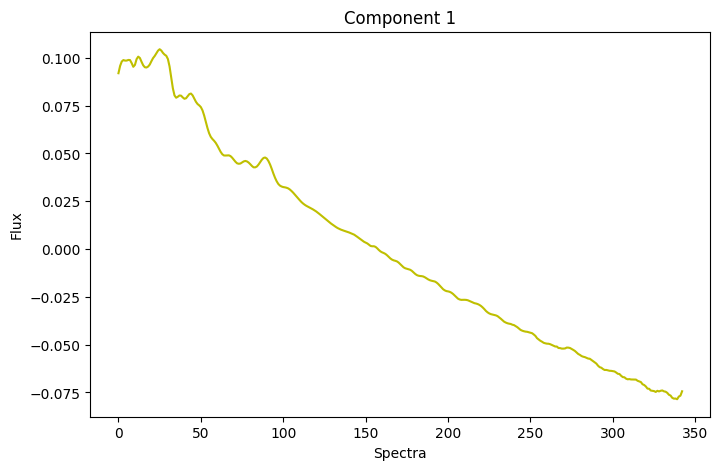

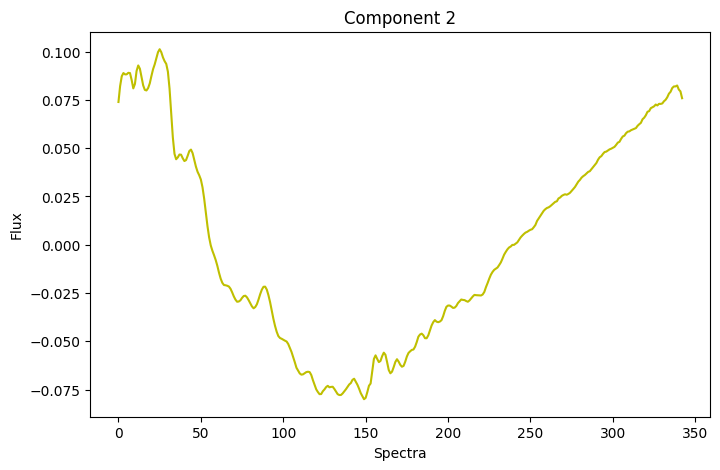

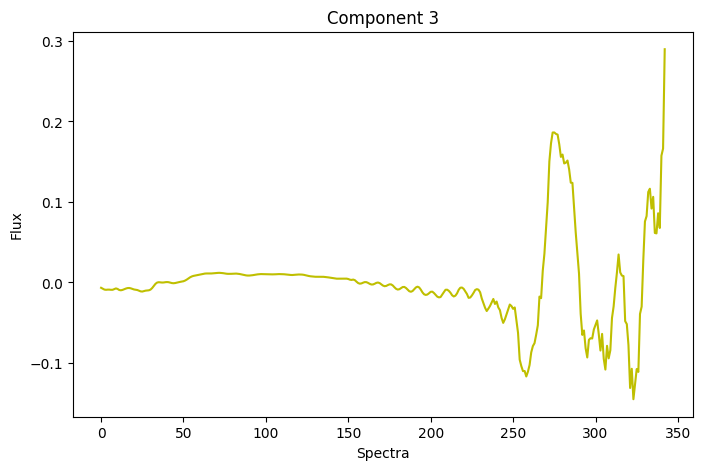

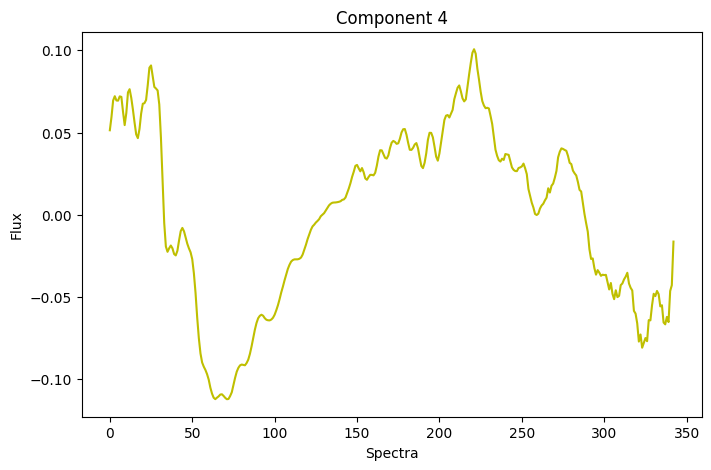

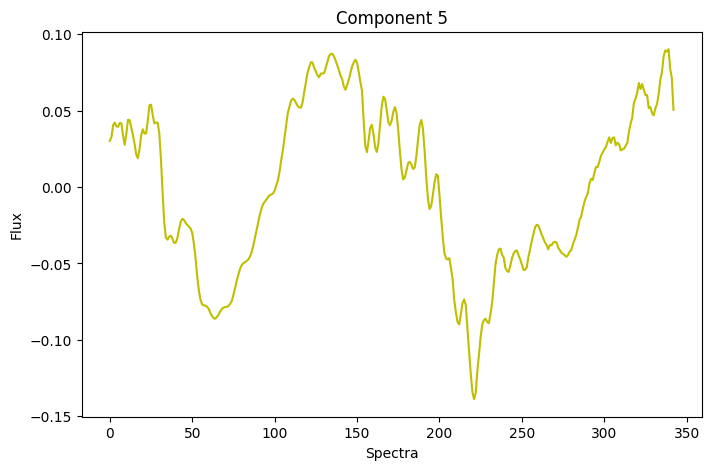

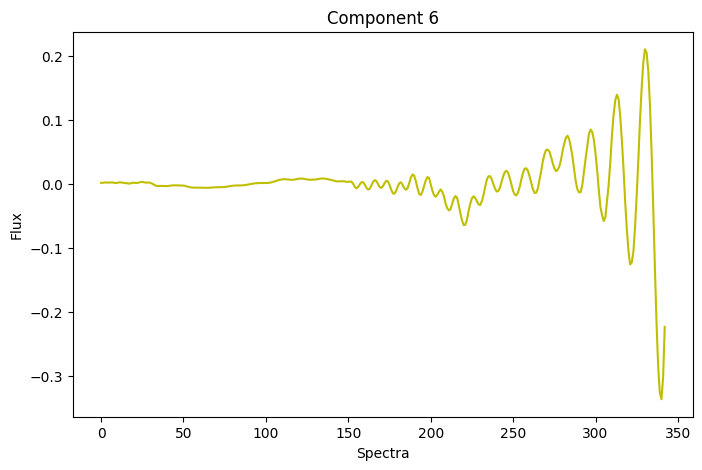

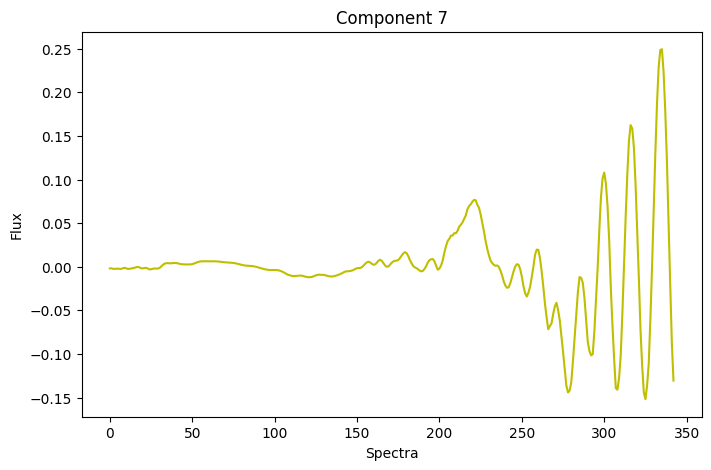

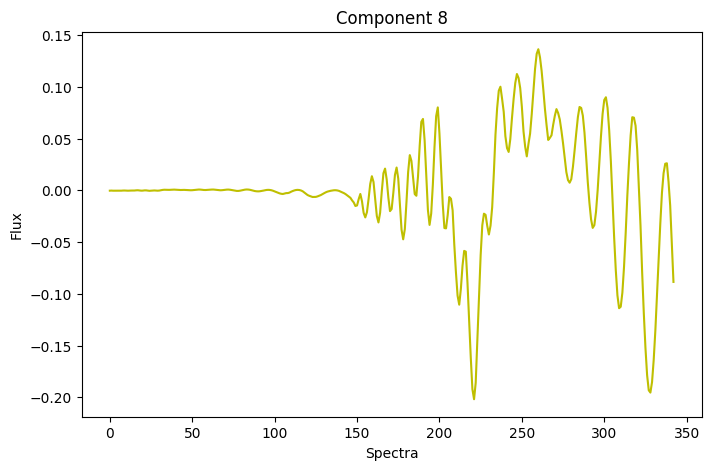

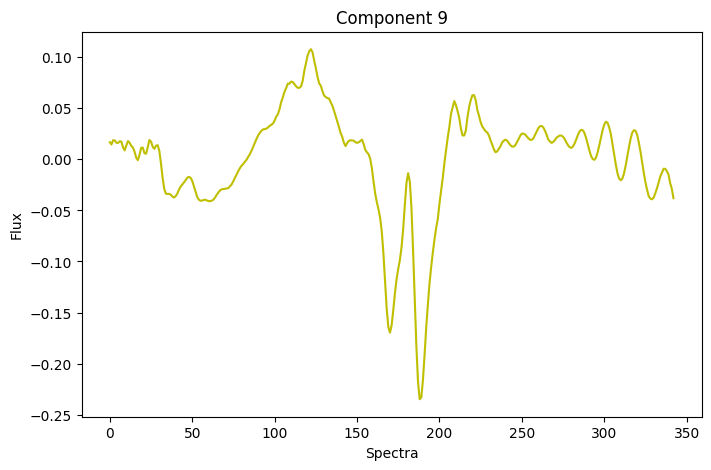

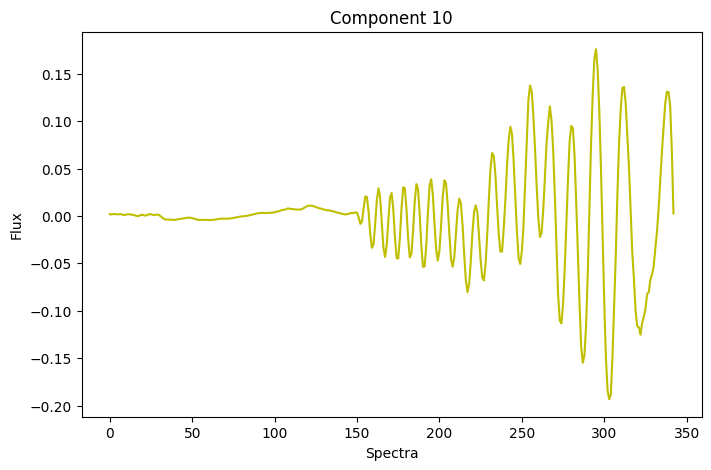

In [41]:
for i in range(1,11):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(lle_transformed_data.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

In [36]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=10, n_neighbors=80, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data_t)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [37]:
hlle_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,-0.114397,0.032572,0.196994,-0.038415,0.412754,-0.087027,0.008713,0.501864,0.475599,-0.013340
1,-0.122036,0.038358,0.183707,-0.026379,0.310342,-0.034165,-0.007190,0.149993,0.099563,-0.033638
2,-0.126917,0.042813,0.145267,-0.012472,0.101588,0.064354,-0.041533,-0.223111,-0.163449,0.011915
3,-0.128888,0.043345,0.125257,-0.011119,0.026896,0.051670,-0.027971,-0.273168,-0.163057,0.034095
4,-0.128420,0.042271,0.129769,-0.015844,0.085274,-0.010017,-0.000106,-0.066158,-0.061568,0.007920
...,...,...,...,...,...,...,...,...,...,...
338,0.026502,0.104424,-0.086939,-0.294578,0.035870,0.108961,0.144569,0.011732,-0.018502,0.058304
339,0.026216,0.105385,-0.093713,-0.344610,0.030578,0.064730,0.067968,0.008174,-0.017109,0.040534
340,0.031850,0.106145,-0.078536,-0.396065,0.008345,0.018415,0.015716,-0.006667,0.002651,-0.047331
341,0.032452,0.105669,-0.071722,-0.375340,-0.001040,-0.040497,-0.069717,-0.015172,0.010746,-0.088993


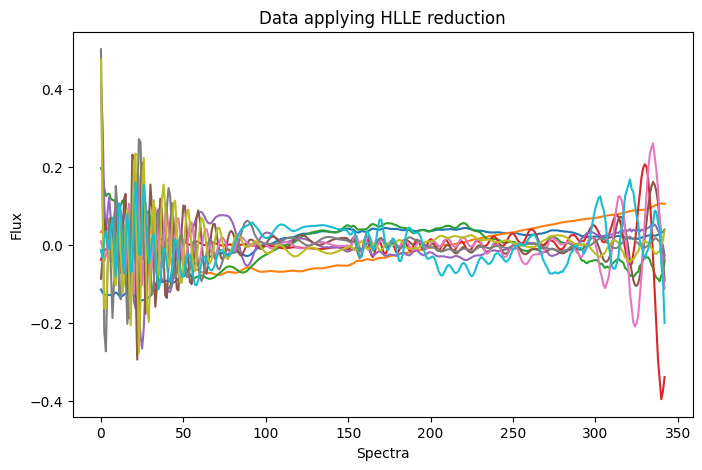

In [38]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(hlle_transformed_data)
plt.show()

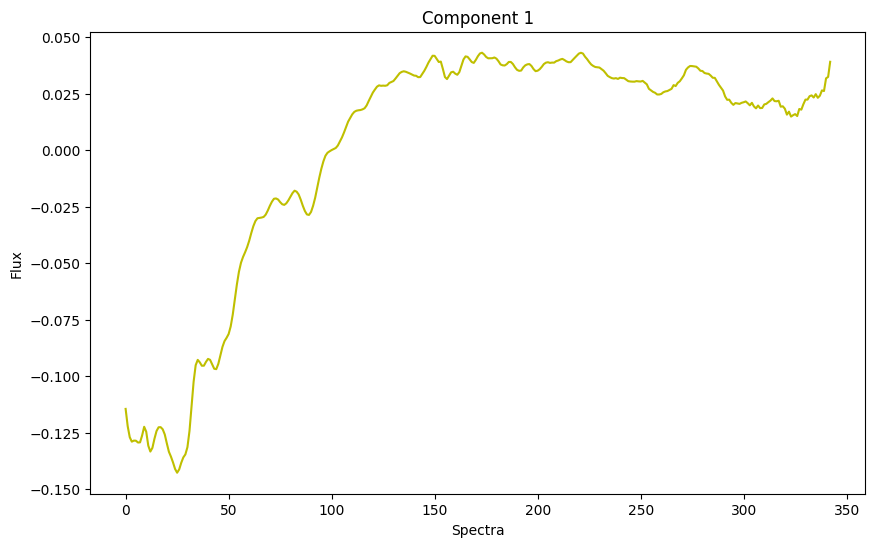

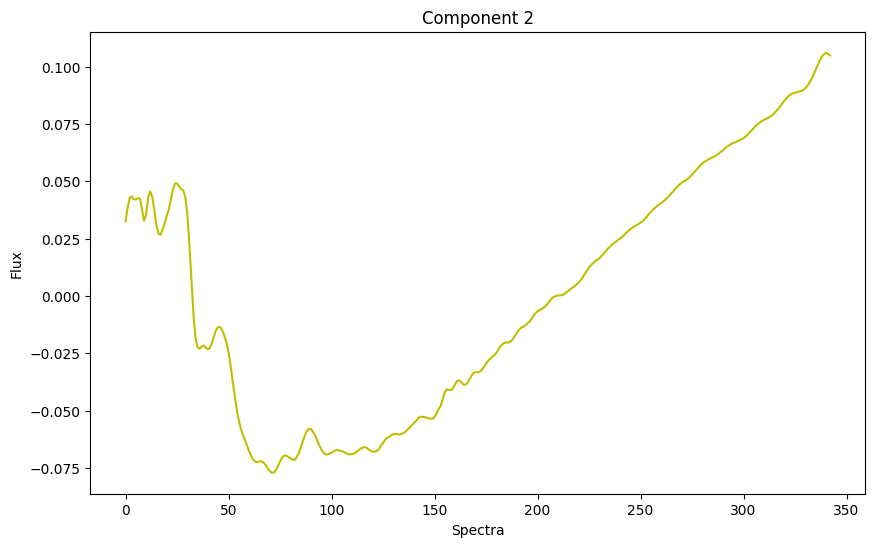

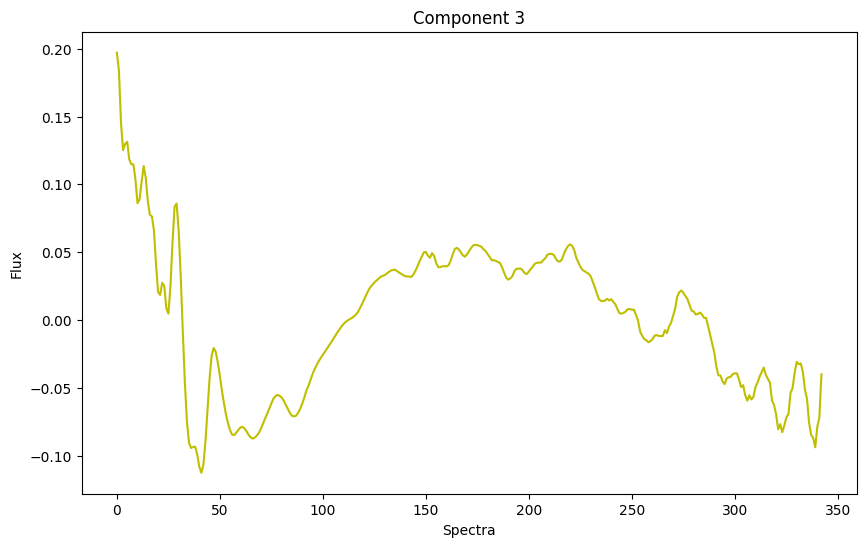

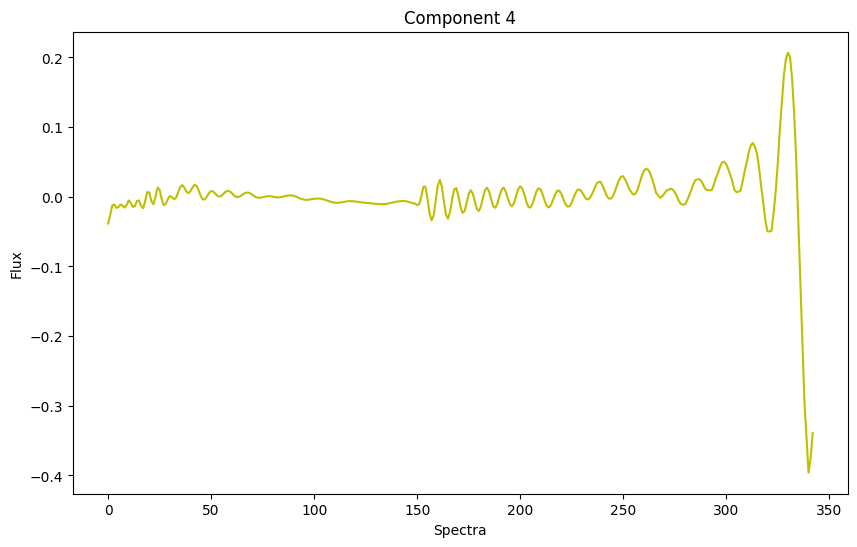

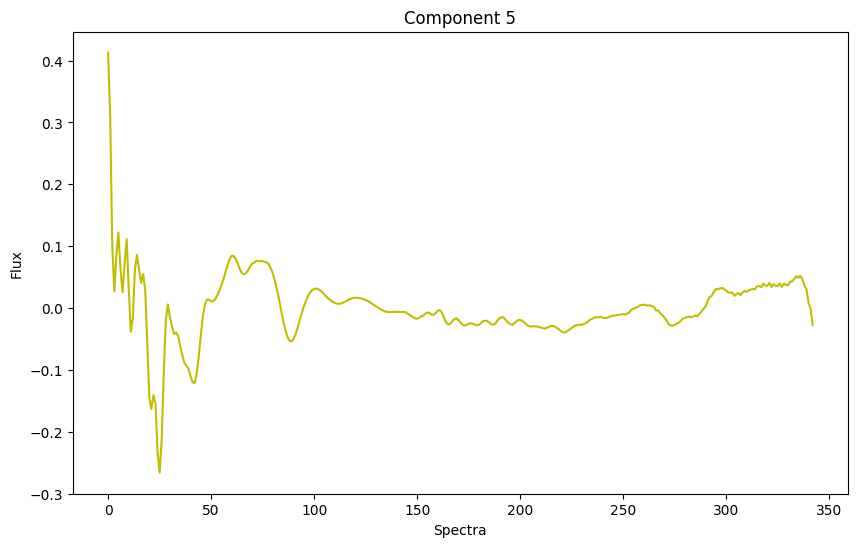

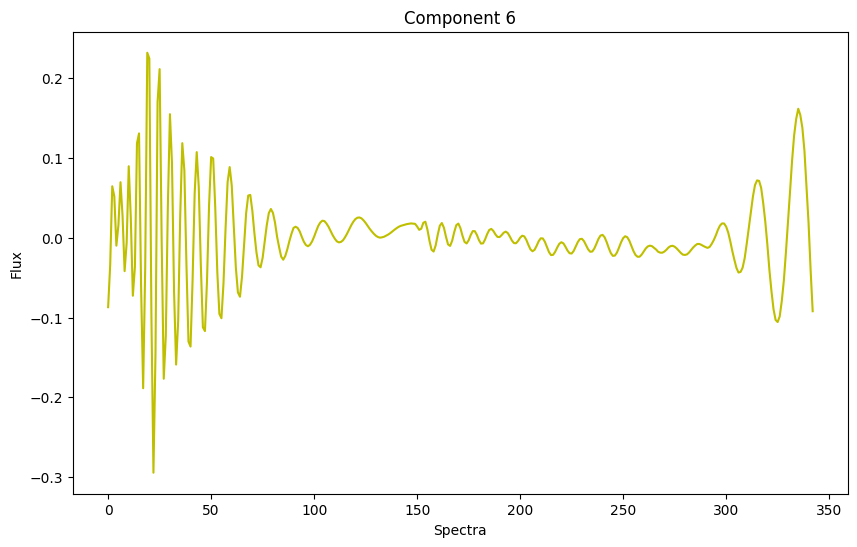

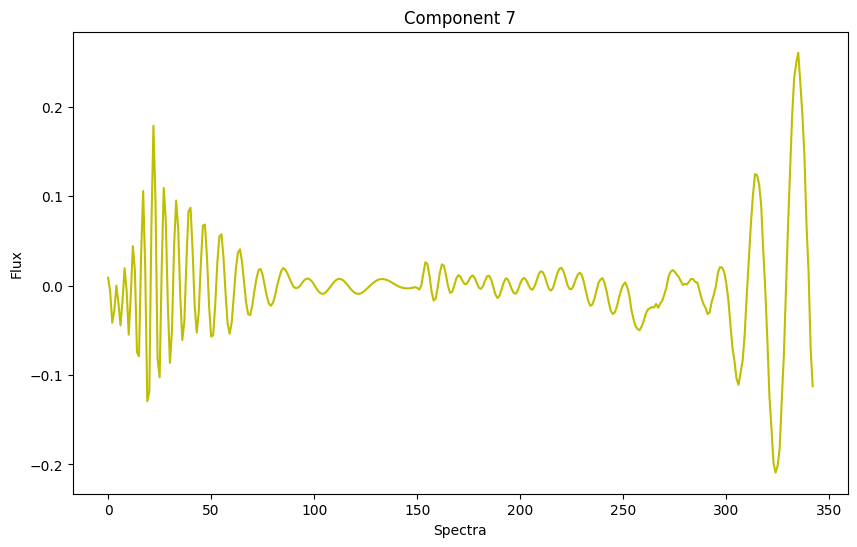

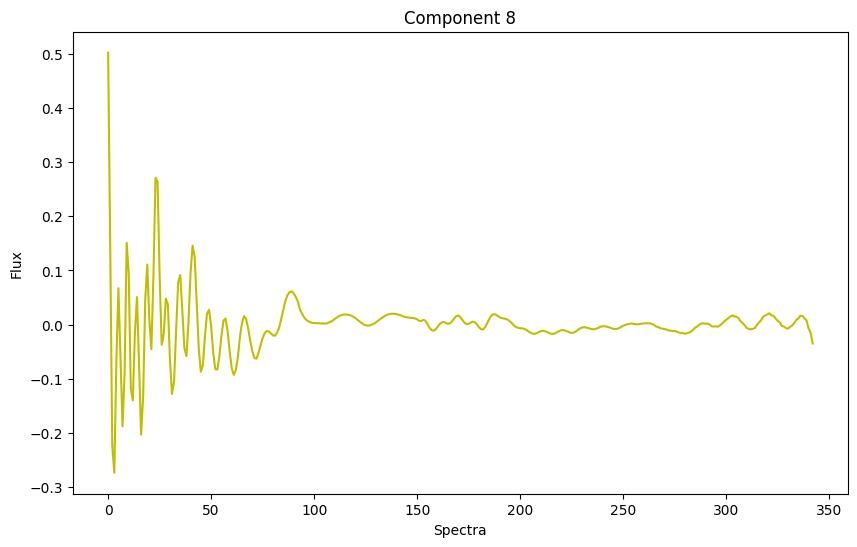

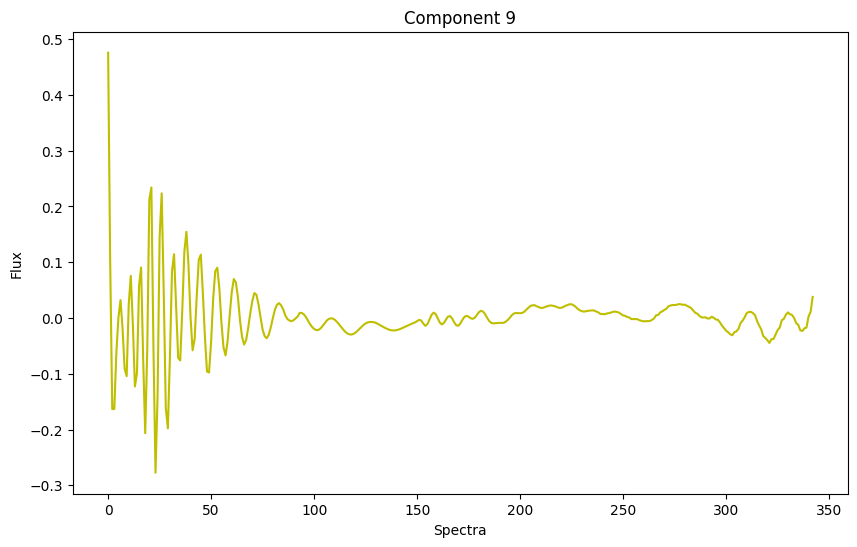

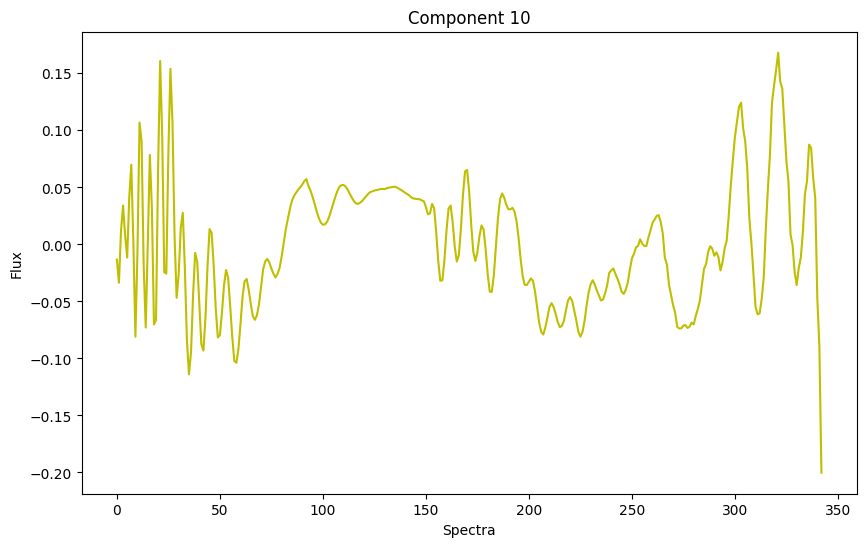

In [43]:
for i in range(1,11):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(hlle_transformed_data.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_23428\3897460035.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


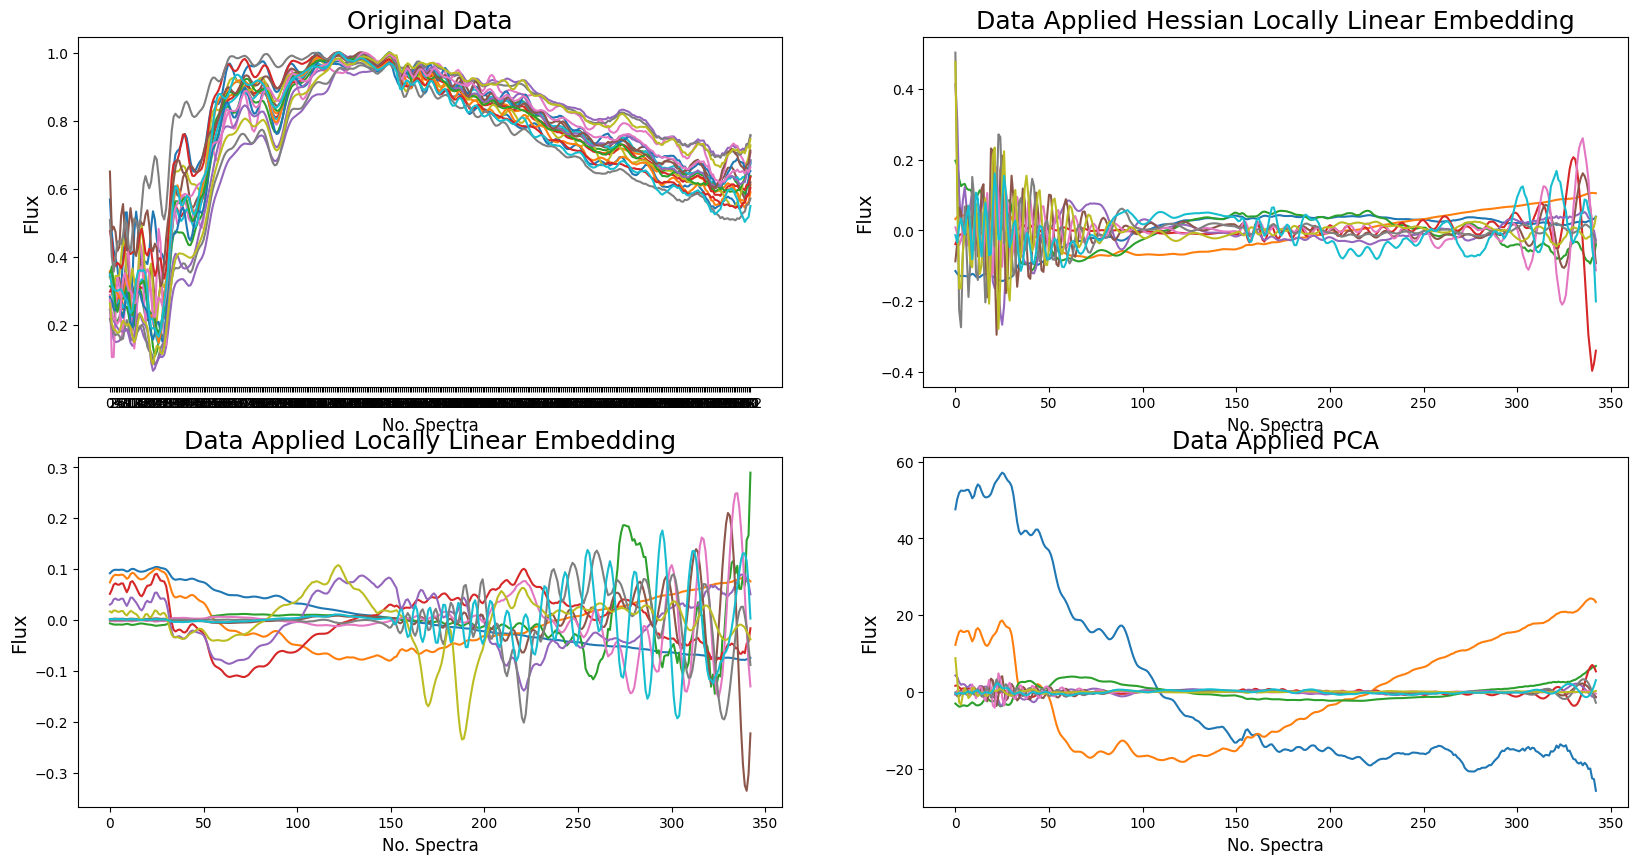

In [46]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:20])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data)

fig.show()

In [35]:
lle_transformed_data.to_csv("DATA_LLE_RG.csv", index=False)

In [36]:
hlle_transformed_data.to_csv("DATA_HESSIAN_NP.csv", index=False)

In [37]:
pca_transformed_data.to_csv("DATA_PCA.csv", index=False)